In [1]:
import numpy as np
import matplotlib.pyplot as plt

![title](img\sig.png)

In [2]:
def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))

In [3]:
def compute_prediction(X , weights):
    """
    Compute the prediction y_hat based on current weights
    """
    z = np.dot(X, weights)
    return sigmoid(z)

![title](img\gd.png)

In [4]:
def update_weights_gd(X_train, y_train, weights, learning_rate): 

    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, (y_train - predictions))
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights

![title](img\cost_function.png)

In [5]:
def compute_cost(X, y, weights):
    """
     Compute the cost J(w)
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions)) 
    return cost

In [6]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
        
    return compute_prediction(X, weights)

In [ ]:
def train_logistic_regression(X_train, y_train, max_iter, 
                                  learning_rate, fit_intercept=False):

    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
        weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train,  weights, learning_rate)   # Check the cost for every 100 (for example)       
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

In [ ]:
X_train = np.array([[6, 7],
                     [2, 4],
                     [3, 6],
                     [4, 7],
                     [1, 6],
                     [5, 2],
                     [2, 0],
                     [6, 3],
                     [4, 1],
                     [7, 2]])
y_train = np.array([0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1])

weights = train_logistic_regression(X_train, y_train,  max_iter=1000, learning_rate=0.1, fit_intercept=True) 

In [9]:
X_test = np.array([[6, 1],
    [1, 3],
    [3, 1],
    [4, 5]])
predictions = predict(X_test, weights)
print(predictions) 

[0.9999478  0.00743991 0.9808652  0.02080847]


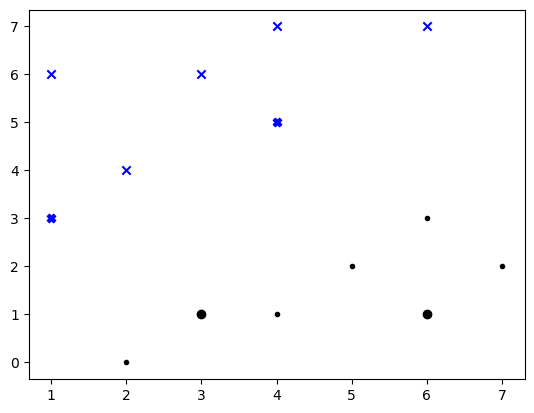

In [10]:
plt.scatter(X_train[:5,0], X_train[:5,1], c='b', marker='x')
plt.scatter(X_train[5:,0], X_train[5:,1], c='k', marker='.')
for i, prediction in enumerate(predictions): 
        marker = 'X' if prediction < 0.5 else 'o' 
        c = 'b' if prediction < 0.5 else 'k' 
        plt.scatter(X_test[i,0], X_test[i,1], c=c, marker=marker)